# Performance Analysis of Linear Models for Salary Prediction   
#### By *Saurabh Kudesia* | Dec 2024 
[![GitHub](https://img.shields.io/badge/GitHub-100000?style=flat&logo=github&logoColor=white)](https://github.com/saurabh-kudesia) [![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=flat&logo=kaggle&logoColor=white)](https://www.kaggle.com/saurabhkudesia) [![LinkedIn](https://img.shields.io/badge/LinkedIn-0A66C2?style=flat&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/saurabhkudesia/)


---
© 2024 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.* 

[![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT) 

<img src="https://images.unsplash.com/photo-1553729459-efe14ef6055d?q=80&w=2070&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" alt="salary" width="100%" style="margin-bottom: 10px;">

*Image Courtsey: [Unsplash.com](https://unsplash.com)*

### Context

This project demonstrates how to train and compare multiple regression models—*Linear Regression*, *Decision Tree Regressor*, *Random Forest Regressor*, and *Support Vector Regressor* — to predict salary based on years of experience. The models are evaluated using key performance metrics, including R², Mean Absolute Error (MAE), Mean Squared Error (MSE), and others. The code allows users to input years of experience to predict salary and compare the accuracy of each model using both training and test data.

The primary focus of this analysis is to assess how well these models predict salaries, with an emphasis on their ability to generalize. By analyzing metrics like R², MAE, and MSE, I aim to identify the most effective model and highlight potential areas for improvement.

### Key Purposes
- **Model Comparison:** Compares multiple regression models to identify the best performer based on various metrics.
- **Model Evaluation:** Assesses how well each model generalizes to unseen data, evaluating performance on both training and test datasets.
- **Visualization:** Visual plots to compare model performance, helping to identify issues such as overfitting or underfitting.
- **Actionable Insights:** Highlights performance discrepancies between training and test sets, offering insights on potential model improvements.

### Value to the User
- **Informed Model Selection:** Helps users choose the best regression model by comparing their performance.
- **Visual and Quantitative Insights:** Provides both visual and numerical insights into model performance, aiding in decision-making.
- **Guidance for Improvement:** Supports model enhancement by offering actionable insights, such as the need for hyperparameter tuning or feature engineering.

### Import Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import scipy

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import statsmodels
import statsmodels.api as sm
from scipy import stats

In [2]:
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("statsmodels version:", statsmodels.__version__)
print("scipy version:", scipy.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.5
seaborn version: 0.12.2
scikit-learn version: 1.2.2
statsmodels version: 0.14.2
scipy version: 1.14.1


In [3]:
df = pd.read_csv ('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [7]:
df.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


### Plot the chart

[]

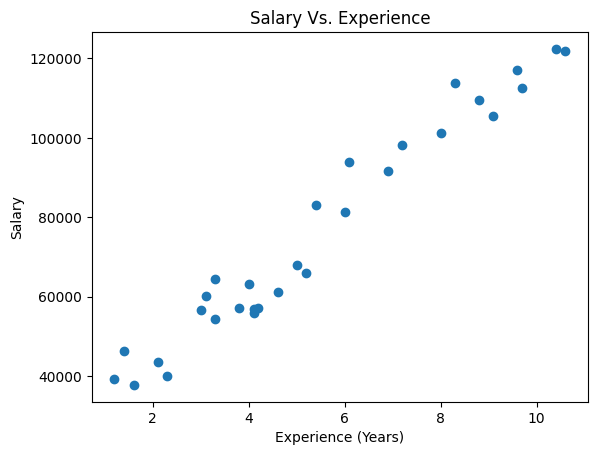

In [8]:
x= df['YearsExperience']
y= df['Salary']

plt.scatter(x, y)
plt.title ('Salary Vs. Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.plot()
           

### Evaluate Performance of Linear Models
When evaluating the performance of linear models, several key metrics can be used to assess their accuracy, predictive power, and overall fit to the data. Below are some of the most commonly used metrics:

| **Metric**                         | **Measures**                                                                                 | **Interpretation**                                                                                                           |
|----------------------------------|------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| R-squared (R²)               | The proportion of the variance in the dependent variable that is predictable from the independent variables. | A value closer to 1 indicates a better fit of the model. A value closer to 0 suggests that the model doesn't explain much.   |
| Adjusted R-squared           | A modified version of R² that adjusts for the number of predictors in the model, accounting for overfitting. | Useful when comparing models with different numbers of predictors. It can decrease if adding predictors doesn't improve the model. |
| Mean Absolute Error (MAE)    | The average of the absolute differences between predicted and true values.                           | A lower MAE indicates better model performance. Provides a straightforward interpretation of the average prediction error.   |
| Mean Squared Error (MSE)     | The average of the squared differences between predicted and true values. It penalizes larger errors more than MAE. | A lower MSE indicates better performance. MSE is sensitive to outliers due to the squaring of errors.                        |
| Root Mean Squared Error (RMSE)| The square root of the MSE, providing error measurement in the same units as the target variable.     | A lower RMSE means better model performance. Like MSE, it gives more weight to large errors.                                 |
| Mean Absolute Percentage Error (MAPE) | The average of the absolute percentage errors between predicted and true values.                       | Useful for understanding relative error in percentage terms. It can be biased when actual values are small or near zero.    |
| F-statistic     | Tests whether at least one of the predictors in the model is statistically significant.              | A higher F-statistic indicates that the model is a significant improvement over a model with no predictors (only intercept).  |
| P-values (for individual predictors)** | Tests the null hypothesis that each predictor has no relationship with the dependent variable.       | A low p-value (< 0.05) suggests that the predictor significantly contributes to explaining the variation in the target variable. |
| Residuals Analysis           | The residuals (errors) are the differences between observed and predicted values.                    | Residuals should be normally distributed and randomly scattered around zero. Patterns suggest non-linearity or heteroscedasticity. Key checks include the Residual vs. Fitted plot (for randomness) and the Histogram or Q-Q plot of residuals (for normality).|
| Cross-validation Scores (e.g., K-fold cross-validation) | The model's performance averaged over multiple training and validation splits.                         | Provides a more reliable estimate of model performance on unseen data, mitigating overfitting. The average score is useful for comparison. |

Each of these metrics can be used depending on the type of data and the goals of the analysis. For example, R² and adjusted R² are good for understanding the overall explanatory power, while MSE and RMSE are often used for evaluating prediction accuracy.

#### Step 1: Prepare Data (Train-Test Split)

In [9]:
# Assuming 'df' contains the columns 'YearsExperience' and 'Salary'
X = df['YearsExperience'].values.reshape(-1, 1)  # Independent variable (YearsExperience)
y = df['Salary'].values  # Dependent variable (Salary)

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 2: Train Models

In [10]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": GradientBoostingRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Support Vector Regression": SVR()
}

# Fit models on training data and make predictions
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Store results
    model_results[name] = {
        'Model': model,
        'y_train_pred': y_train_pred,
        'y_test_pred': y_test_pred,
        'y_train': y_train,
        'y_test': y_test
    }

#### Step 3: Compare Actual vs Predicted Values and Accuracy

In [11]:
# Create dictionary to store the model predictions and actual values
comparison_table = []

# Loop over each model's results
for name, results in model_results.items():
    # Calculate MAE and R2 for both train and test data
    train_mae = mean_absolute_error(results['y_train'], results['y_train_pred'])
    test_mae = mean_absolute_error(results['y_test'], results['y_test_pred'])
    
    train_r2 = r2_score(results['y_train'], results['y_train_pred'])
    test_r2 = r2_score(results['y_test'], results['y_test_pred'])
    
    # Convert R2 to percentage (for accuracy)
    train_accuracy = train_r2 * 100  # Training Accuracy as percentage
    test_accuracy = test_r2 * 100    # Test Accuracy as percentage
    
    # Determine overfit/underfit status
    if train_accuracy > test_accuracy + 20:
        fit_status = 'Overfit'  # Overfitting if training accuracy is much higher than test
    elif test_accuracy > train_accuracy:
        fit_status = 'Underfit'  # Underfitting if test accuracy is higher than training
    elif abs(train_accuracy - test_accuracy) <= 5:
        fit_status = 'Well-Fitted'  # Well-fitted if training and test accuracy are close
    else:
        fit_status = 'Well-Fitted'  # Default assumption if no clear overfitting/underfitting
    
    # Append the results to the comparison table
    comparison_table.append([name, train_r2, test_r2, train_mae, test_mae, train_accuracy, test_accuracy, fit_status])

# Create a DataFrame to display the comparison table
comparison_df = pd.DataFrame(comparison_table, columns=["Model", "Train R²", "Test R²", "Train MAE", "Test MAE", "Train Accuracy (%)", "Test Accuracy (%)", "Fit Status"])

# Display the comparison DataFrame
comparison_df



,Model,Train R²,Test R²,Train MAE,Test MAE,Train Accuracy (%),Test Accuracy (%),Fit Status
0,Linear Regression,0.957453,0.941447,4443.338173,5161.328710,95.745267,94.144662,Well-Fitted
1,Decision Tree Regression,0.999963,0.894473,118.069611,6295.648697,99.996306,89.447333,Well-Fitted
2,Random Forest Regression,0.992770,0.932056,1910.497143,5394.482222,99.277031,93.205570,Well-Fitted
3,Support Vector Regression,-0.145172,-1.082179,21399.242979,28223.237244,-14.517233,-108.217907,Overfit


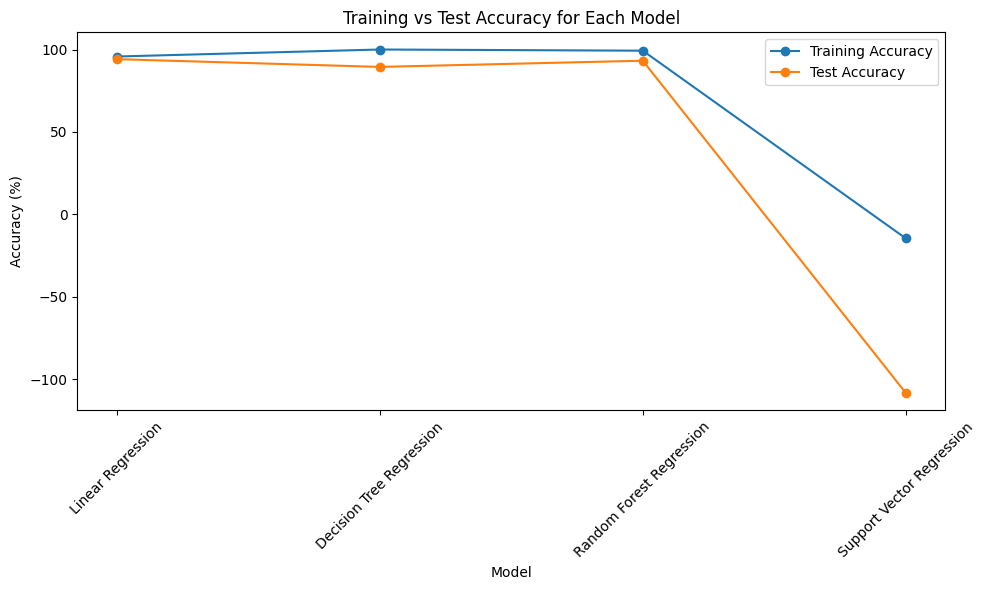

In [12]:
# Plotting the training and test accuracy for each model
plt.figure(figsize=(10, 6))

# Plot the training accuracy (R²) and test accuracy (R²) for each model
plt.plot(comparison_df['Model'], comparison_df['Train Accuracy (%)'], label='Training Accuracy', marker='o')
plt.plot(comparison_df['Model'], comparison_df['Test Accuracy (%)'], label='Test Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Test Accuracy for Each Model')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### Step 4: Fit and improve models (Hyperparameter tuning for Random Forest, SVR)

In [13]:
# Random Forest Regressor hyperparameter tuning
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# Update the results with the best model after fitting
model_results['Random Forest Regression']['Model'] = best_rf

# Support Vector Regression (SVR)
svr = SVR()
param_grid_svr = {
    'C': [1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

grid_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=3)
grid_svr.fit(X_train, y_train)
best_svr = grid_svr.best_estimator_

model_results['Support Vector Regression']['Model'] = best_svr

#### Step 5: Compare Model Improvement

In [14]:
improvement_table = []
for name, results in model_results.items():
    y_train_pred_before = models[name].predict(X_train)
    y_test_pred_before = models[name].predict(X_test)
    
    y_train_pred_after = results['y_train_pred']
    y_test_pred_after = results['y_test_pred']
    
    train_r2_before = r2_score(results['y_train'], y_train_pred_before)
    test_r2_before = r2_score(results['y_test'], y_test_pred_before)
    
    train_r2_after = r2_score(results['y_train'], y_train_pred_after)
    test_r2_after = r2_score(results['y_test'], y_test_pred_after)
    
    r2_improvement = (train_r2_after - train_r2_before) * 100
    
    improvement_table.append([name, train_r2_before, train_r2_after, r2_improvement])

improvement_df = pd.DataFrame(improvement_table, columns=["Model", "Train R2 Before", "Train R2 After", "R2 Improvement (%)"])
improvement_df

,Model,Train R2 Before,Train R2 After,R2 Improvement (%)
0,Linear Regression,0.957453,0.957453,0.0
1,Decision Tree Regression,0.999963,0.999963,0.0
2,Random Forest Regression,0.992770,0.992770,0.0
3,Support Vector Regression,-0.145172,-0.145172,0.0


**Observations**
- For Linear Regression, Decision Tree Regression, and Random Forest Regression, the models are already performing well in training, but no improvements were made.
- The Support Vector Regression model requires attention, as it has a negative R² value, signifying that it is a poor fit for the data, and further modifications may be necessary to improve its performance.

#### Step 6: Residual Analysis and Visualization
Residual analysis helps evaluate how well a regression model fits the data by checking key assumptions, such as randomness, normality, and constant variance of errors. If any assumptions are violated, the model might need adjustments or a different approach.

| **Key Aspect**                | **Explanation**                                                                                               | **Purpose**                                                                                                         |
|-------------------------------|---------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| Residuals                  | The difference between the actual values (what really happened) and the predicted values (what the model said would happen). | To measure the errors of the model. Smaller residuals indicate better predictions.                                 |
| Residual vs. Fitted Plot   | A scatter plot that shows residuals (errors) on the vertical axis and predicted values on the horizontal axis.  | To check if the model's errors are randomly distributed. A good model shows randomness (no patterns) in this plot. |
| Histogram of Residuals     | A plot that shows the distribution of residuals (errors).                                                     | To check if residuals are normally distributed, which is a common assumption in regression.                       |
| Q-Q Plot (Quantile-Quantile Plot) | A plot that compares the residuals' distribution to a normal distribution.                                      | To visually check if residuals follow a normal distribution. Points should align along a straight line for normality.|
| Homoscedasticity | A condition where residuals have constant variance across all levels of the predicted values.                 | To check if the spread of residuals remains consistent. Variations in spread may indicate issues with the model.    |
| Scale-Location Plot        | A plot showing the square root of the absolute residuals vs. the predicted values.                             | To check for homoscedasticity. A random spread of points indicates constant variance (good model).                 |
| Outliers            | Data points that have large residuals, far from the rest of the data.                                          | To identify points that may disproportionately affect the model’s accuracy and results.                           |
| Influential Points         | Data points that, if removed, would significantly change the model's fit.                                      | To identify points that might have a disproportionate influence on the model's predictions.                        |
| Normality of Residuals     | Residuals should ideally follow a normal distribution (bell curve).                                            | To ensure that the model is not biased and to validate statistical tests that rely on normality.                  |

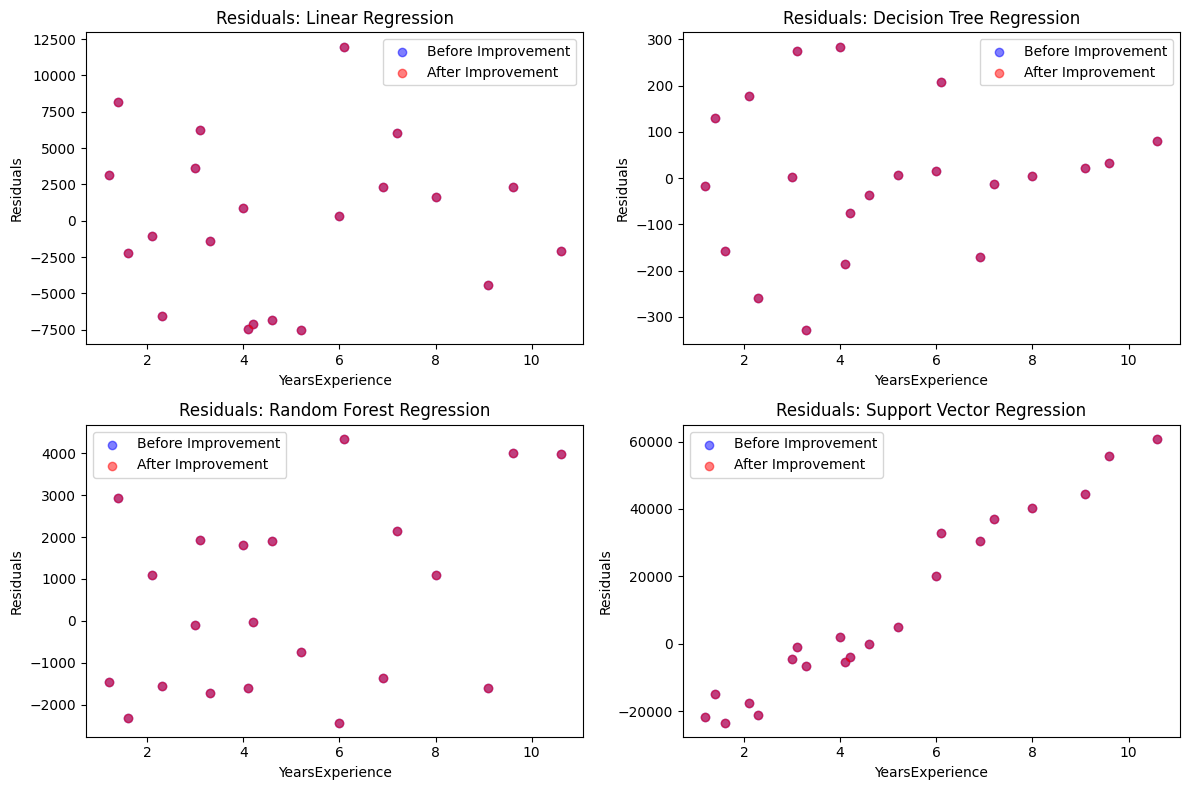

In [15]:
residuals_before = {}
residuals_after = {}

for name, results in model_results.items():
    residuals_before[name] = results['y_train'] - models[name].predict(X_train)
    residuals_after[name] = results['y_train'] - results['y_train_pred']

# Residual Plots
plt.figure(figsize=(12, 8))
for i, (name, residuals) in enumerate(residuals_before.items(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(X_train, residuals, label="Before Improvement", alpha=0.5, color='blue')
    plt.scatter(X_train, residuals_after[name], label="After Improvement", alpha=0.5, color='red')
    plt.title(f'Residuals: {name}')
    plt.xlabel('YearsExperience')
    plt.ylabel('Residuals')
    plt.legend()

plt.tight_layout()
plt.show()

#### Step 7: Take User Input for Experience

In [16]:
years_experience = float(input("Enter Experience of the candidate in years:"))

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

#### Step 8: Predict Salary using Models

In [ ]:
# Check if entered years of experience exists in the dataset
if years_experience in df['YearsExperience'].values:
    # Get the actual salary for the entered years of experience
    actual_salary = df[df['YearsExperience'] == years_experience]['Salary'].values[0]
else:
    actual_salary = None

# Predict salary using models before and after improvement
predictions_before = {}
predictions_after = {}
for name, results in model_results.items():
    prediction_before = models[name].predict(np.array([[years_experience]]))
    prediction_after = results['Model'].predict(np.array([[years_experience]]))
    
    predictions_before[name] = prediction_before[0]
    predictions_after[name] = prediction_after[0]

# Calculate Variance
variance = {name: abs(predictions_before[name] - predictions_after[name]) for name in predictions_before}

# Display Predictions and Variance in a table
prediction_table = []
for name in predictions_before:
    prediction_table.append([name, predictions_before[name], predictions_after[name], variance[name]])

prediction_df = pd.DataFrame(prediction_table, columns=["Model", "Before Improvement", "After Improvement", "Variance"])

# Show the actual salary if exists
if actual_salary is not None:
    print(f"Actual Salary for {years_experience} years of experience: {actual_salary}")
else:
    print(f"Entered years of experience ({years_experience}) does not exist in the dataset.")

# Display the table of predictions
prediction_df

**Observations**
- *Linear Regression* and *Decision Tree Regression* are not impacted by the improvements, implying that they were already performing optimally on the given data.
- *Random Forest Regression* saw a small improvement, indicating that the applied changes had a slight positive effect.
- *Support Vector Regression* benefited the most from the adjustments, showing a significant reduction in error or loss, which suggests it was the most improved model after the changes were made.

#### Step 9: Plot the actual vs predicted salary values for all models

In [ ]:
models_names = list(predictions_before.keys())
actual_values = [actual_salary] * len(models_names) if actual_salary is not None else [None] * len(models_names)
predicted_values_before = list(predictions_before.values())
predicted_values_after = list(predictions_after.values())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(models_names, predicted_values_before, label="Before Improvement", marker='o', linestyle='--', color='red')
plt.plot(models_names, predicted_values_after, label="After Improvement", marker='o', linestyle='-', color='blue')

# If actual salary exists, plot it
if actual_salary is not None:
    plt.axhline(y=actual_salary, color='green', linestyle='-', label="Actual Salary")

plt.xlabel("Models")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary (Before and After Improvement)")
plt.legend()
plt.grid(True)
plt.show()

#### Step 10: Calculate Evaluation Metrics

In [ ]:
evaluation_metrics = []
for name, results in model_results.items():
    y_train_pred = results['y_train_pred']
    y_test_pred = results['y_test_pred']
    
    r2_train = r2_score(results['y_train'], y_train_pred)
    r2_test = r2_score(results['y_test'], y_test_pred)
    
    mae_train = mean_absolute_error(results['y_train'], y_train_pred)
    mae_test = mean_absolute_error(results['y_test'], y_test_pred)
    
    mse_train = mean_squared_error(results['y_train'], y_train_pred)
    mse_test = mean_squared_error(results['y_test'], y_test_pred)
    
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    mape_train = mean_absolute_percentage_error(results['y_train'], y_train_pred)
    mape_test = mean_absolute_percentage_error(results['y_test'], y_test_pred)
    
    # Statsmodels for F-statistic and P-values
    X_train_sm = sm.add_constant(X_train)  # Add constant to X for statsmodels
    model_sm = sm.OLS(results['y_train'], X_train_sm).fit()
    f_stat = model_sm.fvalue
    p_values = model_sm.pvalues
    
    # Cross-validation
    cv_scores = cross_val_score(results['Model'], X_train, y_train, cv=5)
    
    evaluation_metrics.append([name, r2_train, r2_test, mae_train, mae_test, mse_train, mse_test, rmse_train, rmse_test, mape_train, mape_test, f_stat, p_values[0], np.mean(cv_scores)])

evaluation_df = pd.DataFrame(evaluation_metrics, columns=[
    "Model", "Train R2", "Test R2", "Train MAE", "Test MAE", "Train MSE", "Test MSE", 
    "Train RMSE", "Test RMSE", "Train MAPE", "Test MAPE", "F-statistic", "P-value", "Cross-validation score"
])

evaluation_df

**Observations**
- *Linear Regression* and *Random Forest Regression* are the top-performing models in terms of generalization, with good performance on both training and test data, though *Random Forest* slightly outperforms *Linear Regression*.
- *Decision Tree Regression* shows significant overfitting, with excellent performance on the training data but a drastic drop in test performance.
- *Support Vector Regression (SVR)* is the worst-performing model, with very poor predictive power, as indicated by the negative R² values, high MAE, MSE, RMSE, and MAPE.
- In summary, *Linear Regression* and *Random Forest Regression* are the most reliable models, with *Random Forest* being slightly superior in this case, while *Support Vector Regression (SVR)* requires significant adjustments, and *Decision Tree Regression* suffers from overfitting.

### Key Learnings

#### Limitations
1. **Simplistic Metrics**: The evaluation relies on basic metrics like R² and MAE. While useful, these metrics alone may not fully capture the performance nuances of complex models or the underlying problem. For example, models might show similar R² values but behave differently in other aspects (e.g., bias vs. variance tradeoff, model robustness).
   
2. **Lack of Model Tuning**: The code does not include steps for hyperparameter tuning or model optimization (e.g., grid search, random search). It compares models based on default settings, which may not represent the best performance for each model.

3. **Assumption of Data Quality**: The analysis assumes that the dataset (`df`) is clean and properly preprocessed. If the data contains noise, outliers, or missing values, the model performance might be adversely affected. The code does not include data cleaning steps.

4. **Limited to Regression Problems**: The models used (Linear Regression, Random Forest, etc.) are typically for regression tasks. For classification tasks, different models (like decision trees for classification or SVM for classification) would be needed, and the metrics (e.g., accuracy, precision, recall) would also differ.

5. **Evaluation Metrics Might Not Capture All Insights**: While R² and MAE are common metrics, they might not always provide complete insights into model performance, especially in cases where there is skewness in data or outliers that could influence the metrics.

6. **Overfitting/Underfitting Detection**: The code provides some insight into overfitting/underfitting by comparing training and test performance. However, it doesn’t perform more advanced diagnostics like cross-validation or plotting learning curves to further investigate these issues.

7. **Limited Residual Analysis**: Although the code briefly mentions residual analysis, it does not include detailed residual diagnostics (e.g., residual plots) that could help uncover model issues or assumptions violations, especially in regression tasks.

#### Conclusion
The code is valuable in providing a comparative performance analysis of multiple regression models on both training and test datasets. It helps users identify the most effective model and visualize key performance differences. However, its limitations lie in the use of basic evaluation metrics, lack of advanced tuning, and potential neglect of some important diagnostics (such as cross-validation and residual analysis). For users looking to further optimize and validate their models, additional steps like hyperparameter tuning, advanced diagnostics, and comprehensive validation strategies would be beneficial.

> 📣 **Help Me Improve**
>
> If you found this notebook helpful, please consider giving it an upvote — it really helps!
>
> Your feedback is always welcome and appreciated.
>
> If you notice any issues, have suggestions, or just want to share your thoughts, feel free to leave a comment.
>
> Thanks a lot for your support and time!

---
© 2024 Saurabh Kudesia

*This project is licensed under the [MIT License](https://opensource.org/licenses/MIT). You are free to use, modify, and distribute this code, provided you include proper attribution and retain the license notice.* [![License: MIT](https://img.shields.io/badge/License-MIT-blue.svg)](https://opensource.org/licenses/MIT)